In [1]:
import numpy as np
from numpy import linalg
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('seaborn-white')

/home/bhanu/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


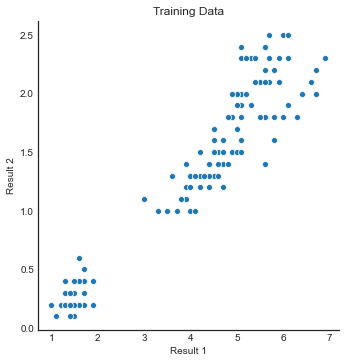

In [2]:
#Read sample data for K_Means Clustering
test_data = pd.read_excel('Data.xlsx')
n_arr = test_data.to_numpy()
f = sns.pairplot(x_vars=['Result 1'], y_vars=['Result 2'], data=test_data, height=5)
plt.title('Training Data')
plt.savefig('raw_data.png',dpi=150,bbox_inches='tight')

In [3]:
# Create a function to generate random centres based on mean and standard deviation of given data.
def get_initial_centroids(data, k):
    # Number of training data
    n = data.shape[0]
    # Number of features in the data
    c = data.shape[1]
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centers = np.random.randn(k,c)*std + mean
    plt.scatter(data[:,0], data[:,1])
    plt.scatter(centers[:,0], centers[:,1], marker='P', c='r',s=200)
    plt.title('Initial Random Centres')
    plt.savefig('initial_centroids.png',dpi=150,bbox_inches='tight')
    return(centers)

# Create a function to calculate euclidean distance from the centres.    
def get_euclidean_distance(data,centers):
    eu_distance = np.zeros((data.shape[0],centers.shape[0]))
    for i in range(centers.shape[0]):
        eu_distance[:,i] = np.linalg.norm(data - centers[i], axis=1)
    return(eu_distance)

# Create a function to find the cluster ID for each data point based on minimum distance from centres.    
def get_clusters(data, centers,distance):
    k = centers.shape[0]
    clusters = {}
    nearest_cluster = np.argmin(distance, axis=1)
    for i in range(k):
        clusters[i] = []
    for i, cluster_id in enumerate(nearest_cluster):
        clusters[cluster_id].append(data[i])
    return clusters

# Create a function to apply K_means algorithm till the distance between old and new clusters become less than defined limit
def K_means(data,k,distance,centres,delta):
    old_centroids = np.zeros(centers.shape) 
    new_centroids = centers
    centroid_distance = get_euclidean_distance(old_centroids,new_centroids)
    max_centroid_distance = np.max(centroid_distance.diagonal())
    while max_centroid_distance >= delta :
        old_centroids = new_centroids
        clusters = get_clusters(data,old_centroids,distance)
        new_centroids = np.array([np.mean(clusters[key], axis=0, dtype=data.dtype) for key in sorted(clusters.keys())])
        centroid_distance = get_euclidean_distance(old_centroids,new_centroids)
        max_centroid_distance = np.max(centroid_distance.diagonal())
    print('The final centroid points are : \n',new_centroids)
    return(new_centroids) 

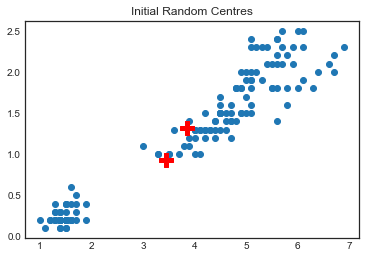

In [4]:
# Get initial random centres
centers = get_initial_centroids(n_arr,2)

In [5]:
# Get the eucledian distance of all data points from initial centres. 
distance = get_euclidean_distance(n_arr,centers)

In [6]:
# Perform K_means analysis based on intial centres to find final centroids,clusters and distances.
final_centroids = K_means(n_arr,2,distance,centers,1/10)
final_distance = get_euclidean_distance(n_arr,final_centroids)
final_clusters = get_clusters(n_arr,final_centroids,final_distance)

The final centroid points are : 
 [[1.66785714 0.32857143]
 [5.00319149 1.71808511]]


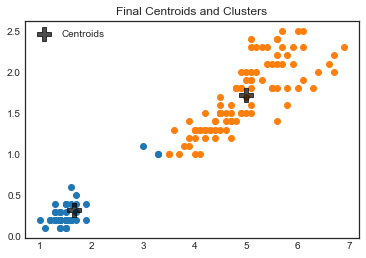

In [37]:
#Plot K_means classes with centroids.
for centroid, points in final_clusters.items():
    points = np.array(points)
    centroid = np.round(np.mean(points, axis=0),3)
    plt.scatter(points[:, 0], points[:, 1], marker='o',)
    plt.grid()
plt.scatter(final_centroids[:,0], final_centroids[:,1], marker='P', c='black',s=200,alpha = 0.7,label = 'Centroids')
plt.title('Final Centroids and Clusters')
plt.legend()
plt.savefig('final_centroids.png',dpi=150,bbox_inches='tight')